In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import transforms

from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
# To Read out 100 rows rather than the default value. 
pd.set_option('display.max_rows', 1000)

In [4]:
# Importing the Scada data
df = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj1_plti.csv', header = 0)

print('Size: ')
print(df.shape)

Size: 
(146294, 25)


In [5]:
df2 = df.iloc[:, 0:15]
df_drop = df2[df2.isnull().any(axis=1)]
df2 = df2.drop(df_drop.index.values)
print(df2.shape)

X = df2.iloc[:, 1:14]
Y = df2.iloc[:, 14]
cols_indices = X.columns

(146257, 15)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(117005, 13) (117005,)
(29252, 13) (29252,)


In [7]:
# Build a forest and compute the feature importances
abc = AdaBoostClassifier(n_estimators = 100, random_state = 0)

abc.fit(X, Y)
abc_importances = abc.feature_importances_
abc_std = np.std([tree.feature_importances_ for tree in abc.estimators_], axis = 0)
abc_indices = np.argsort(abc_importances)[::-1]
abc_cols_indices = cols_indices[abc_indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, abc_cols_indices[f], abc_importances[abc_indices[f]]))

Feature ranking:
1. Expected_MES (0.260000)
2. i_dur (0.160000)
3. i_dor (0.150000)
4. i_period (0.150000)
5. N_Transit (0.080000)
6. i_epoch (0.050000)
7. i_ror (0.040000)
8. i_depth (0.040000)
9. Sky_Group (0.040000)
10. i_b (0.030000)
11. Offset_distance (0.000000)
12. Offset_from_source (0.000000)
13. EB_injection (0.000000)


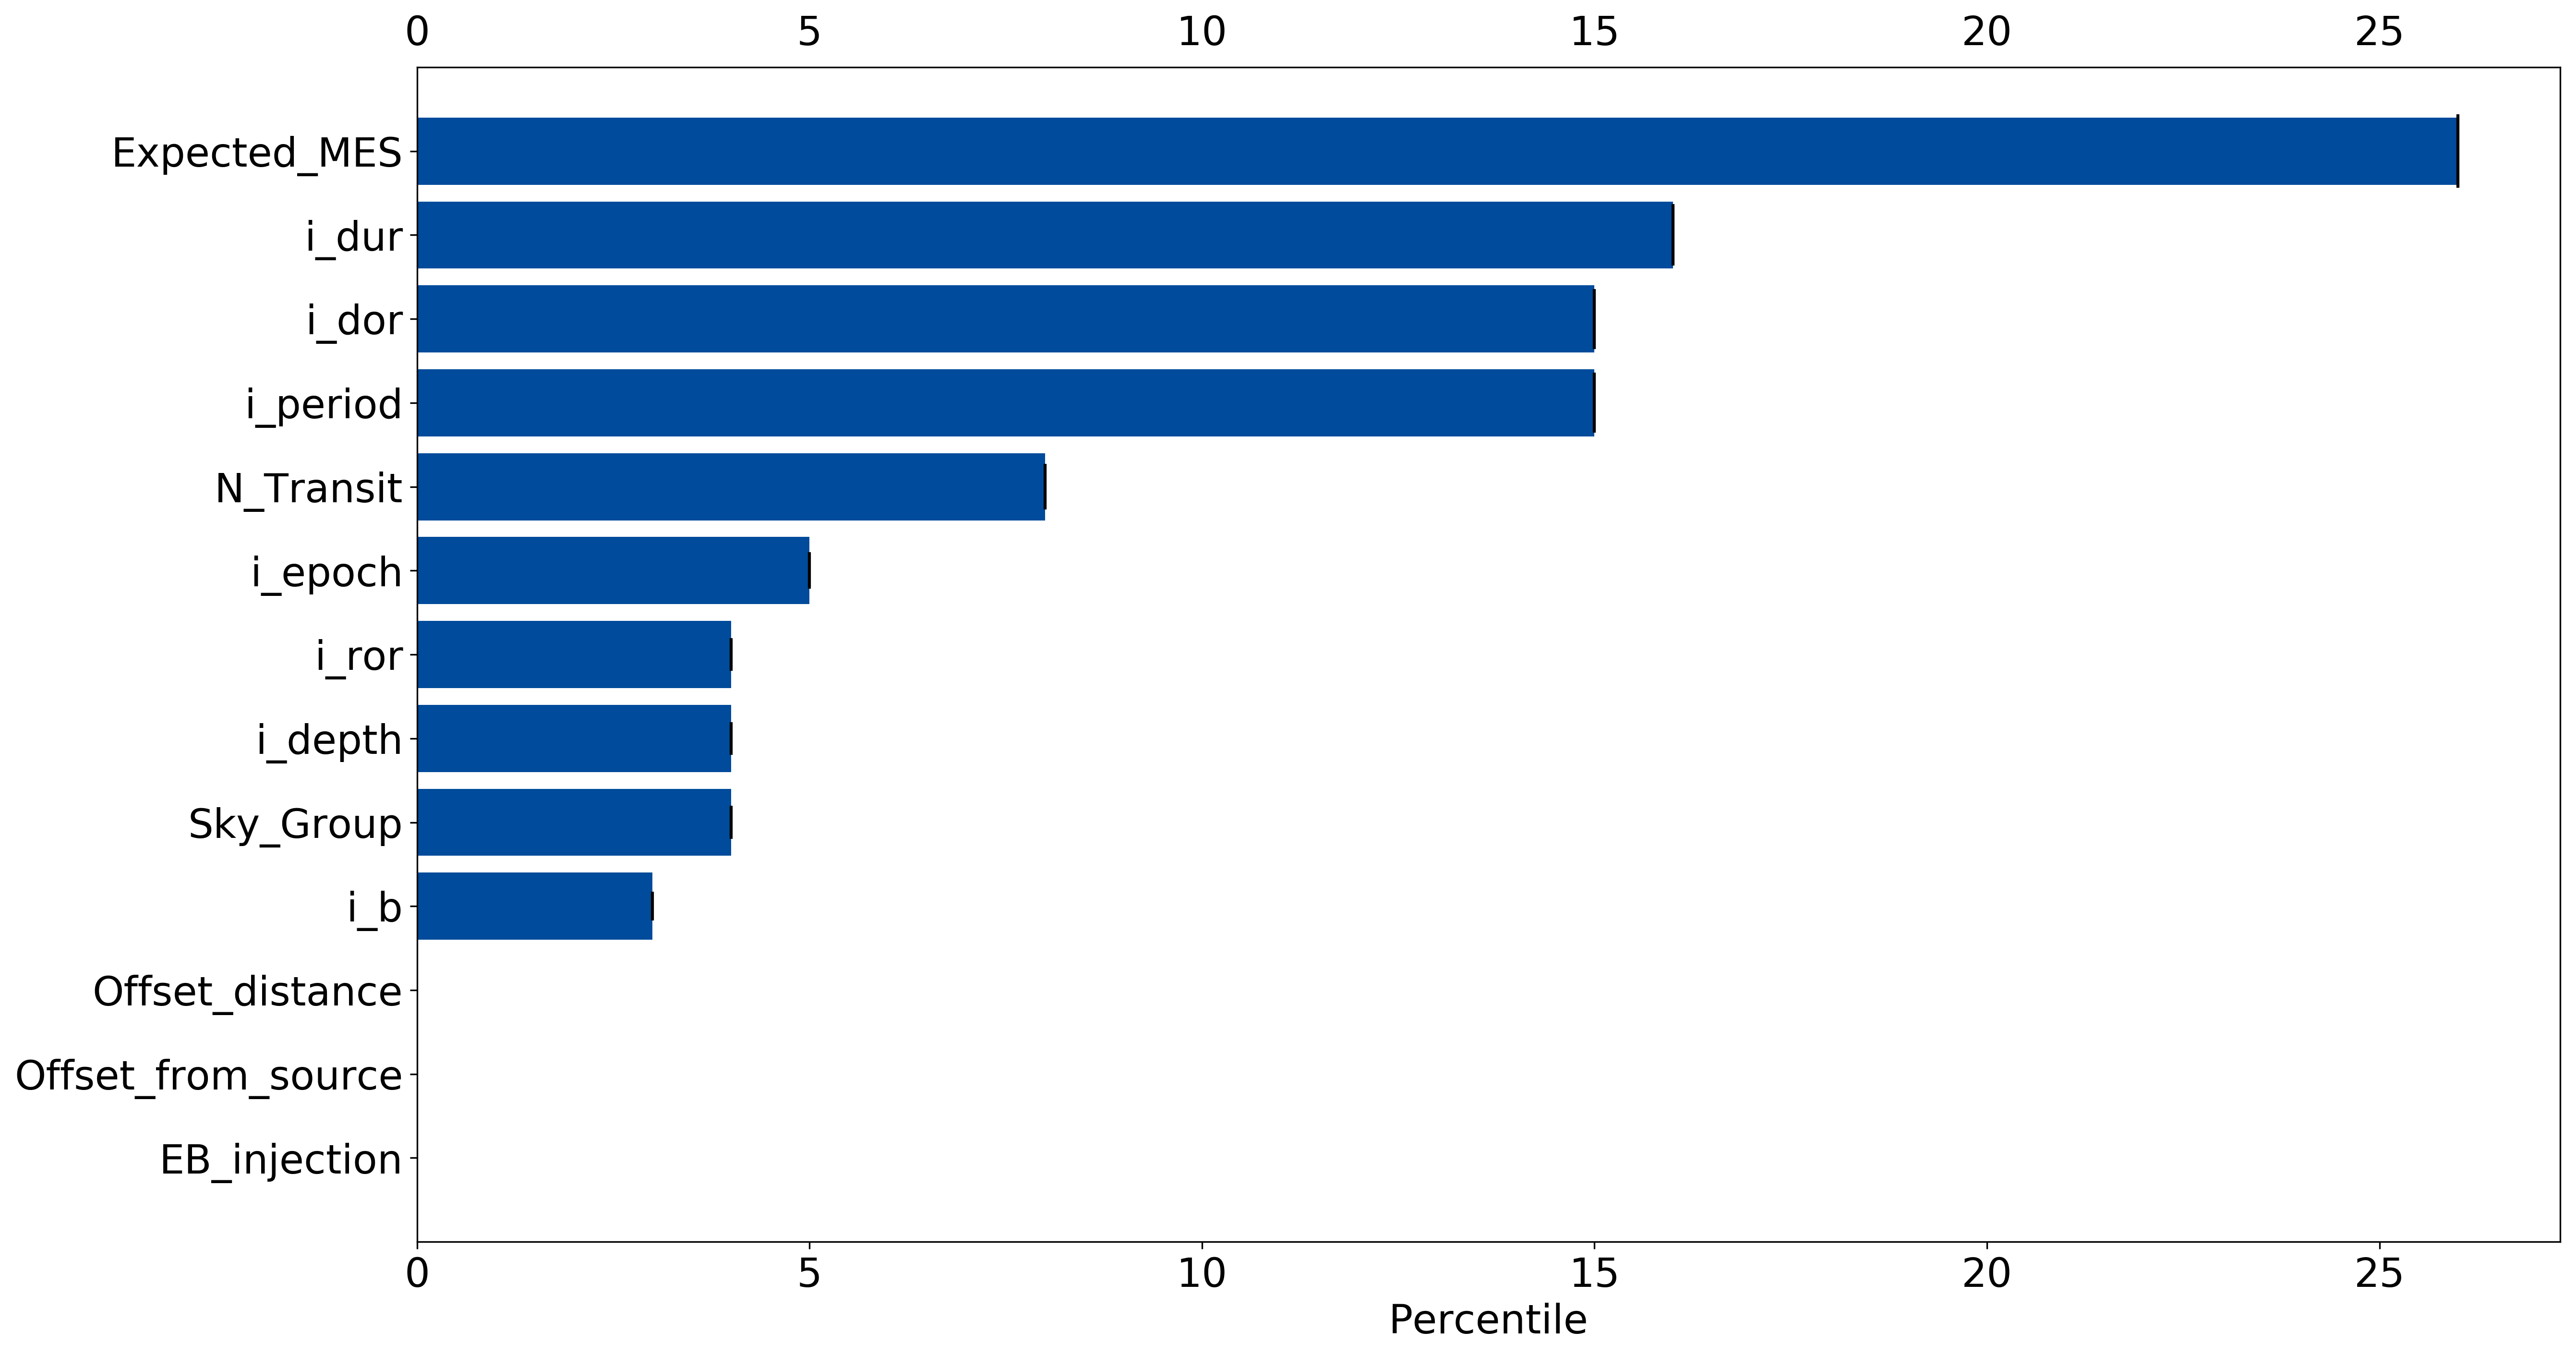

In [8]:
# Plot the feature importances of the forest
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()
plt.barh(range(X.shape[1]), abc_importances[abc_indices]*100, color = '#004B9B', yerr=abc_std[abc_indices], align="center")

plt.yticks(range(X.shape[1]), abc_cols_indices, fontsize=20)
plt.ylim([X.shape[1], -1])
 
plt.tick_params(axis='x', labelbottom = True, labeltop = True)
plt.xticks(fontsize = 20)
plt.xlabel('Percentile', fontsize=20)

plt.savefig('full_dataset - ada_boost.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [9]:
# Build a forest and compute the feature importances
etc = ExtraTreesClassifier(n_estimators = 200, max_depth = 20, random_state = 0, verbose = 1)

etc.fit(X, Y)
etc_importances = etc.feature_importances_
etc_std = np.std([tree.feature_importances_ for tree in etc.estimators_], axis = 0)
etc_indices = np.argsort(etc_importances)[::-1]
etc_cols_indices = cols_indices[etc_indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, etc_cols_indices[f], etc_importances[etc_indices[f]]))

Feature ranking:
1. Expected_MES (0.519389)
2. N_Transit (0.114569)
3. i_dor (0.070063)
4. i_b (0.068502)
5. i_dur (0.065965)
6. i_period (0.046788)
7. i_ror (0.041910)
8. i_depth (0.032096)
9. i_epoch (0.024264)
10. Sky_Group (0.016455)
11. Offset_distance (0.000000)
12. Offset_from_source (0.000000)
13. EB_injection (0.000000)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   27.9s finished


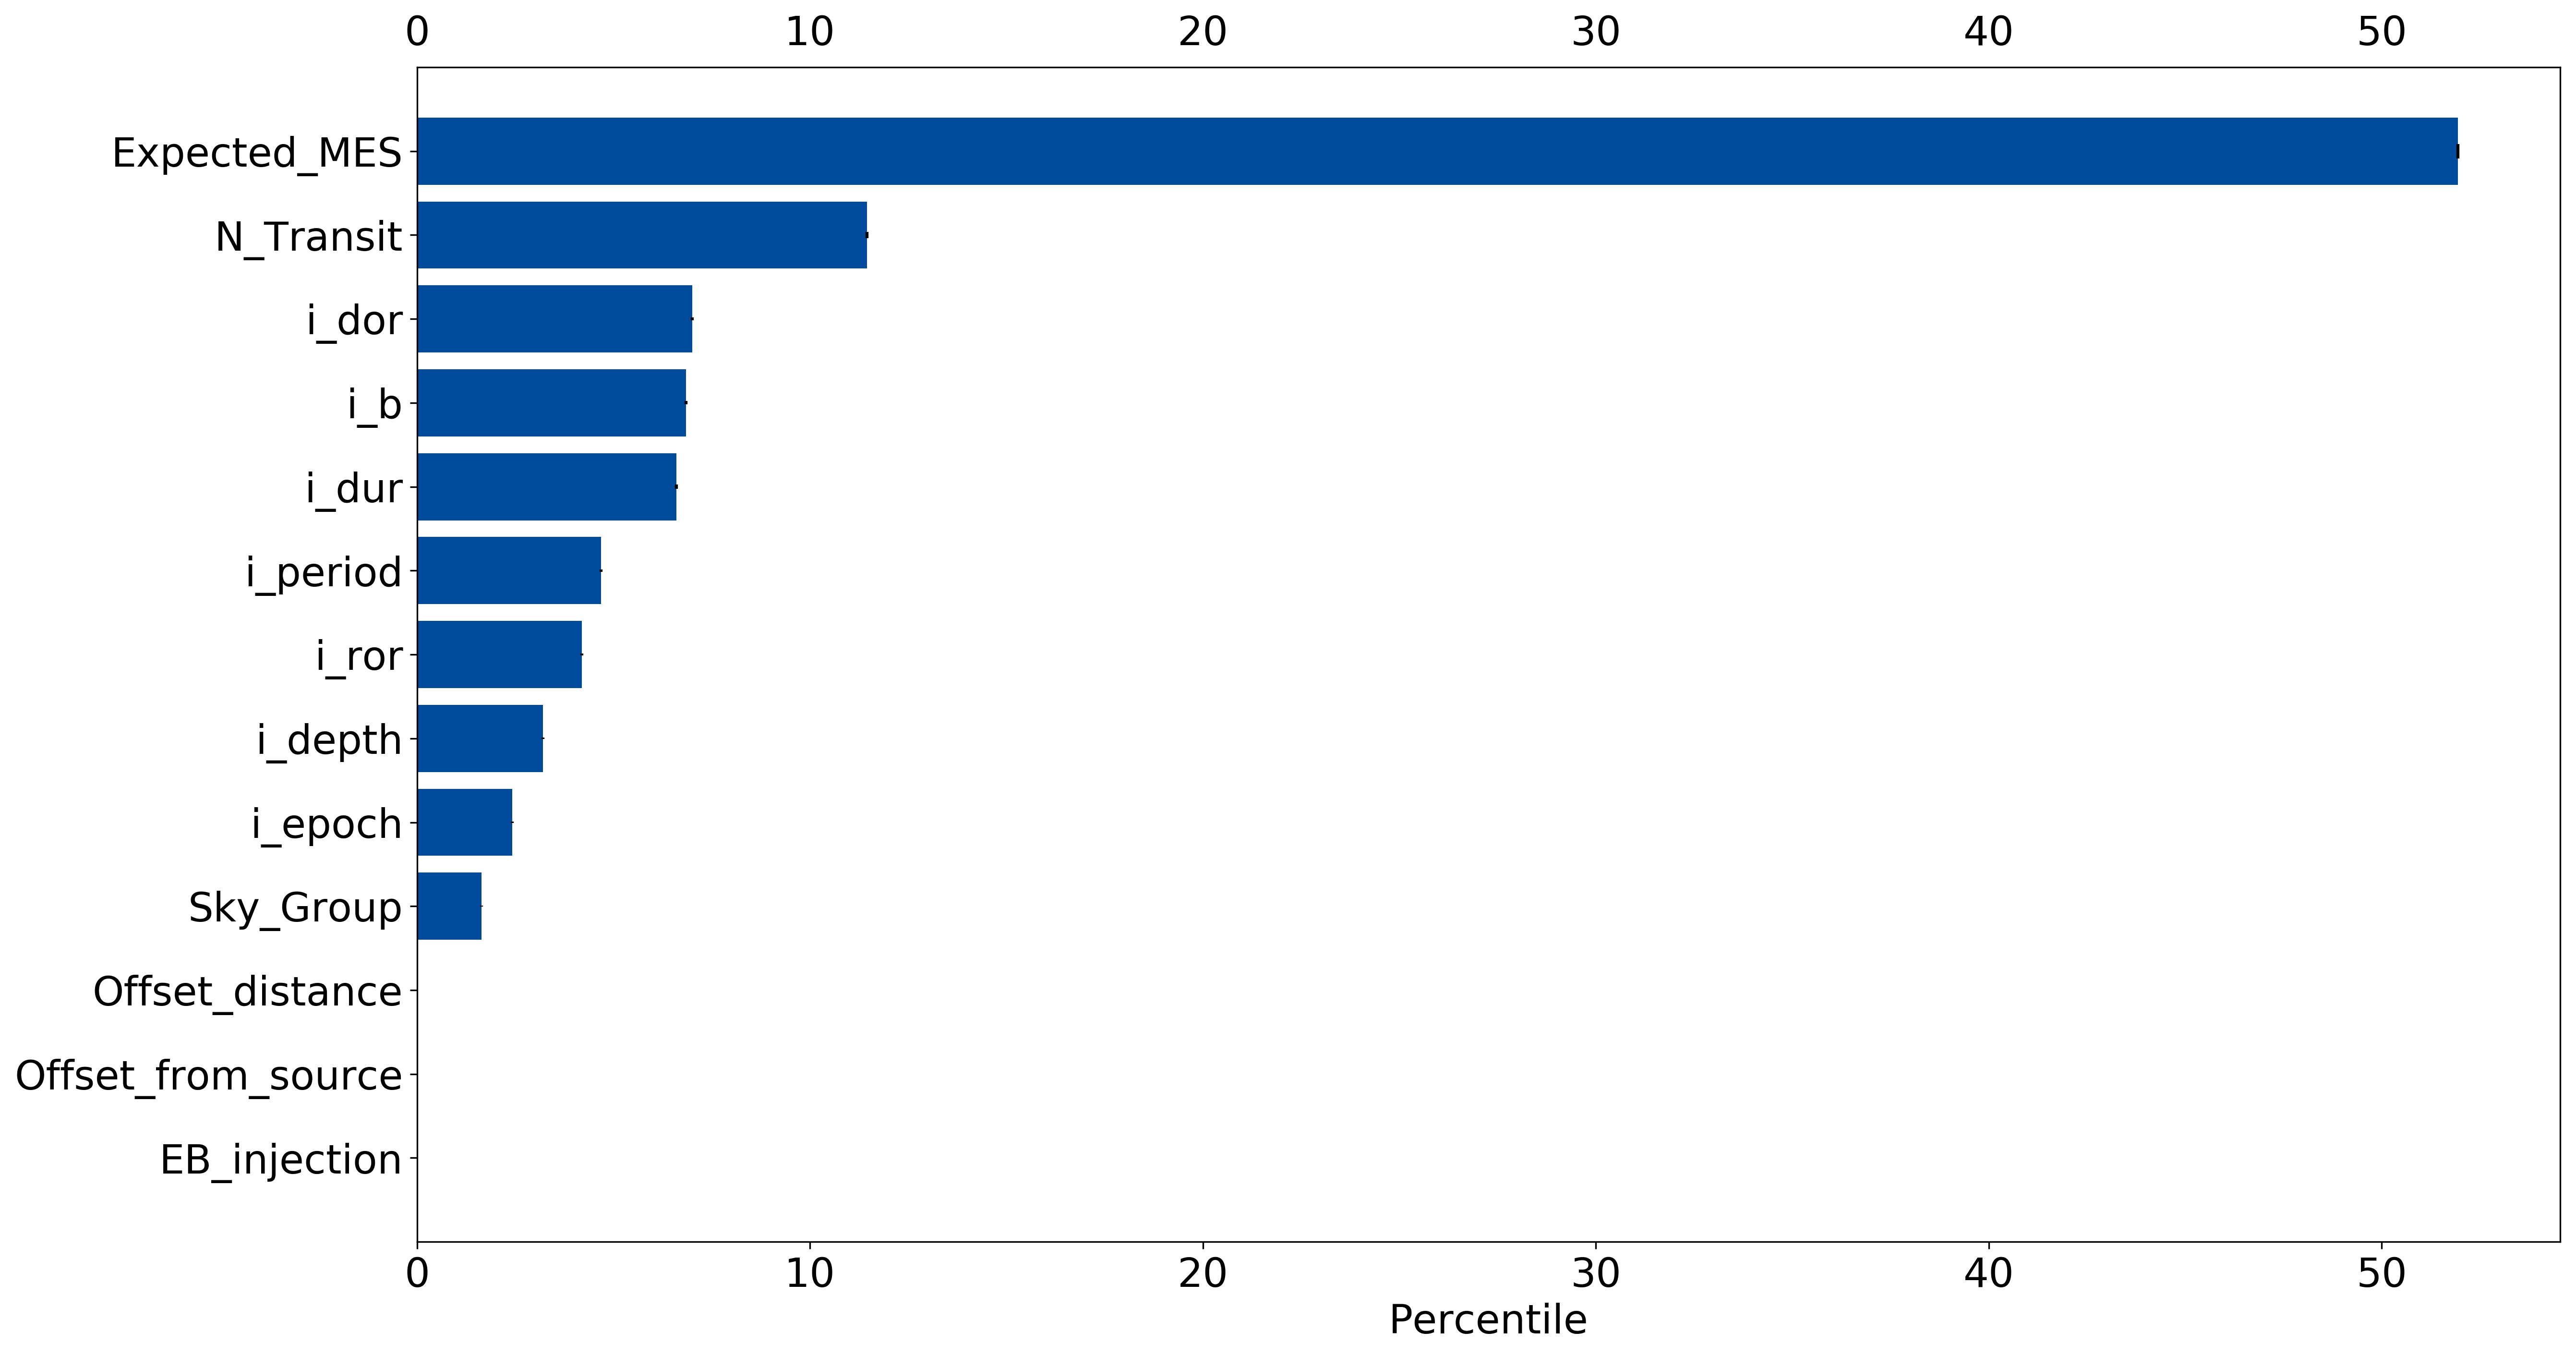

In [10]:
# Plot the feature importances of the forest
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()
plt.barh(range(X.shape[1]), etc_importances[etc_indices]*100, color = '#004B9B', yerr=etc_std[etc_indices], align="center")

plt.yticks(range(X.shape[1]), etc_cols_indices, fontsize=20)
plt.ylim([X.shape[1], -1])

plt.tick_params(axis='x', labelbottom = True, labeltop = True)
plt.xticks(fontsize = 20)
plt.xlabel('Percentile', fontsize=20)

plt.savefig('full_dataset - extra_trees.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [11]:
# Build a forest and compute the feature importances
rfc = RandomForestClassifier(n_estimators = 350, max_depth = 17, random_state = 0, verbose = 1)

rfc.fit(X, Y)
rfc_importances = rfc.feature_importances_
rfc_std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
rfc_indices = np.argsort(rfc_importances)[::-1]
rfc_cols_indices = cols_indices[rfc_indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, rfc_cols_indices[f], rfc_importances[rfc_indices[f]]))

Feature ranking:
1. Expected_MES (0.588333)
2. N_Transit (0.089825)
3. i_dur (0.086534)
4. i_dor (0.054588)
5. i_depth (0.035925)
6. i_period (0.034722)
7. i_b (0.034533)
8. i_ror (0.034353)
9. i_epoch (0.024406)
10. Sky_Group (0.016780)
11. Offset_distance (0.000000)
12. Offset_from_source (0.000000)
13. EB_injection (0.000000)


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  3.6min finished


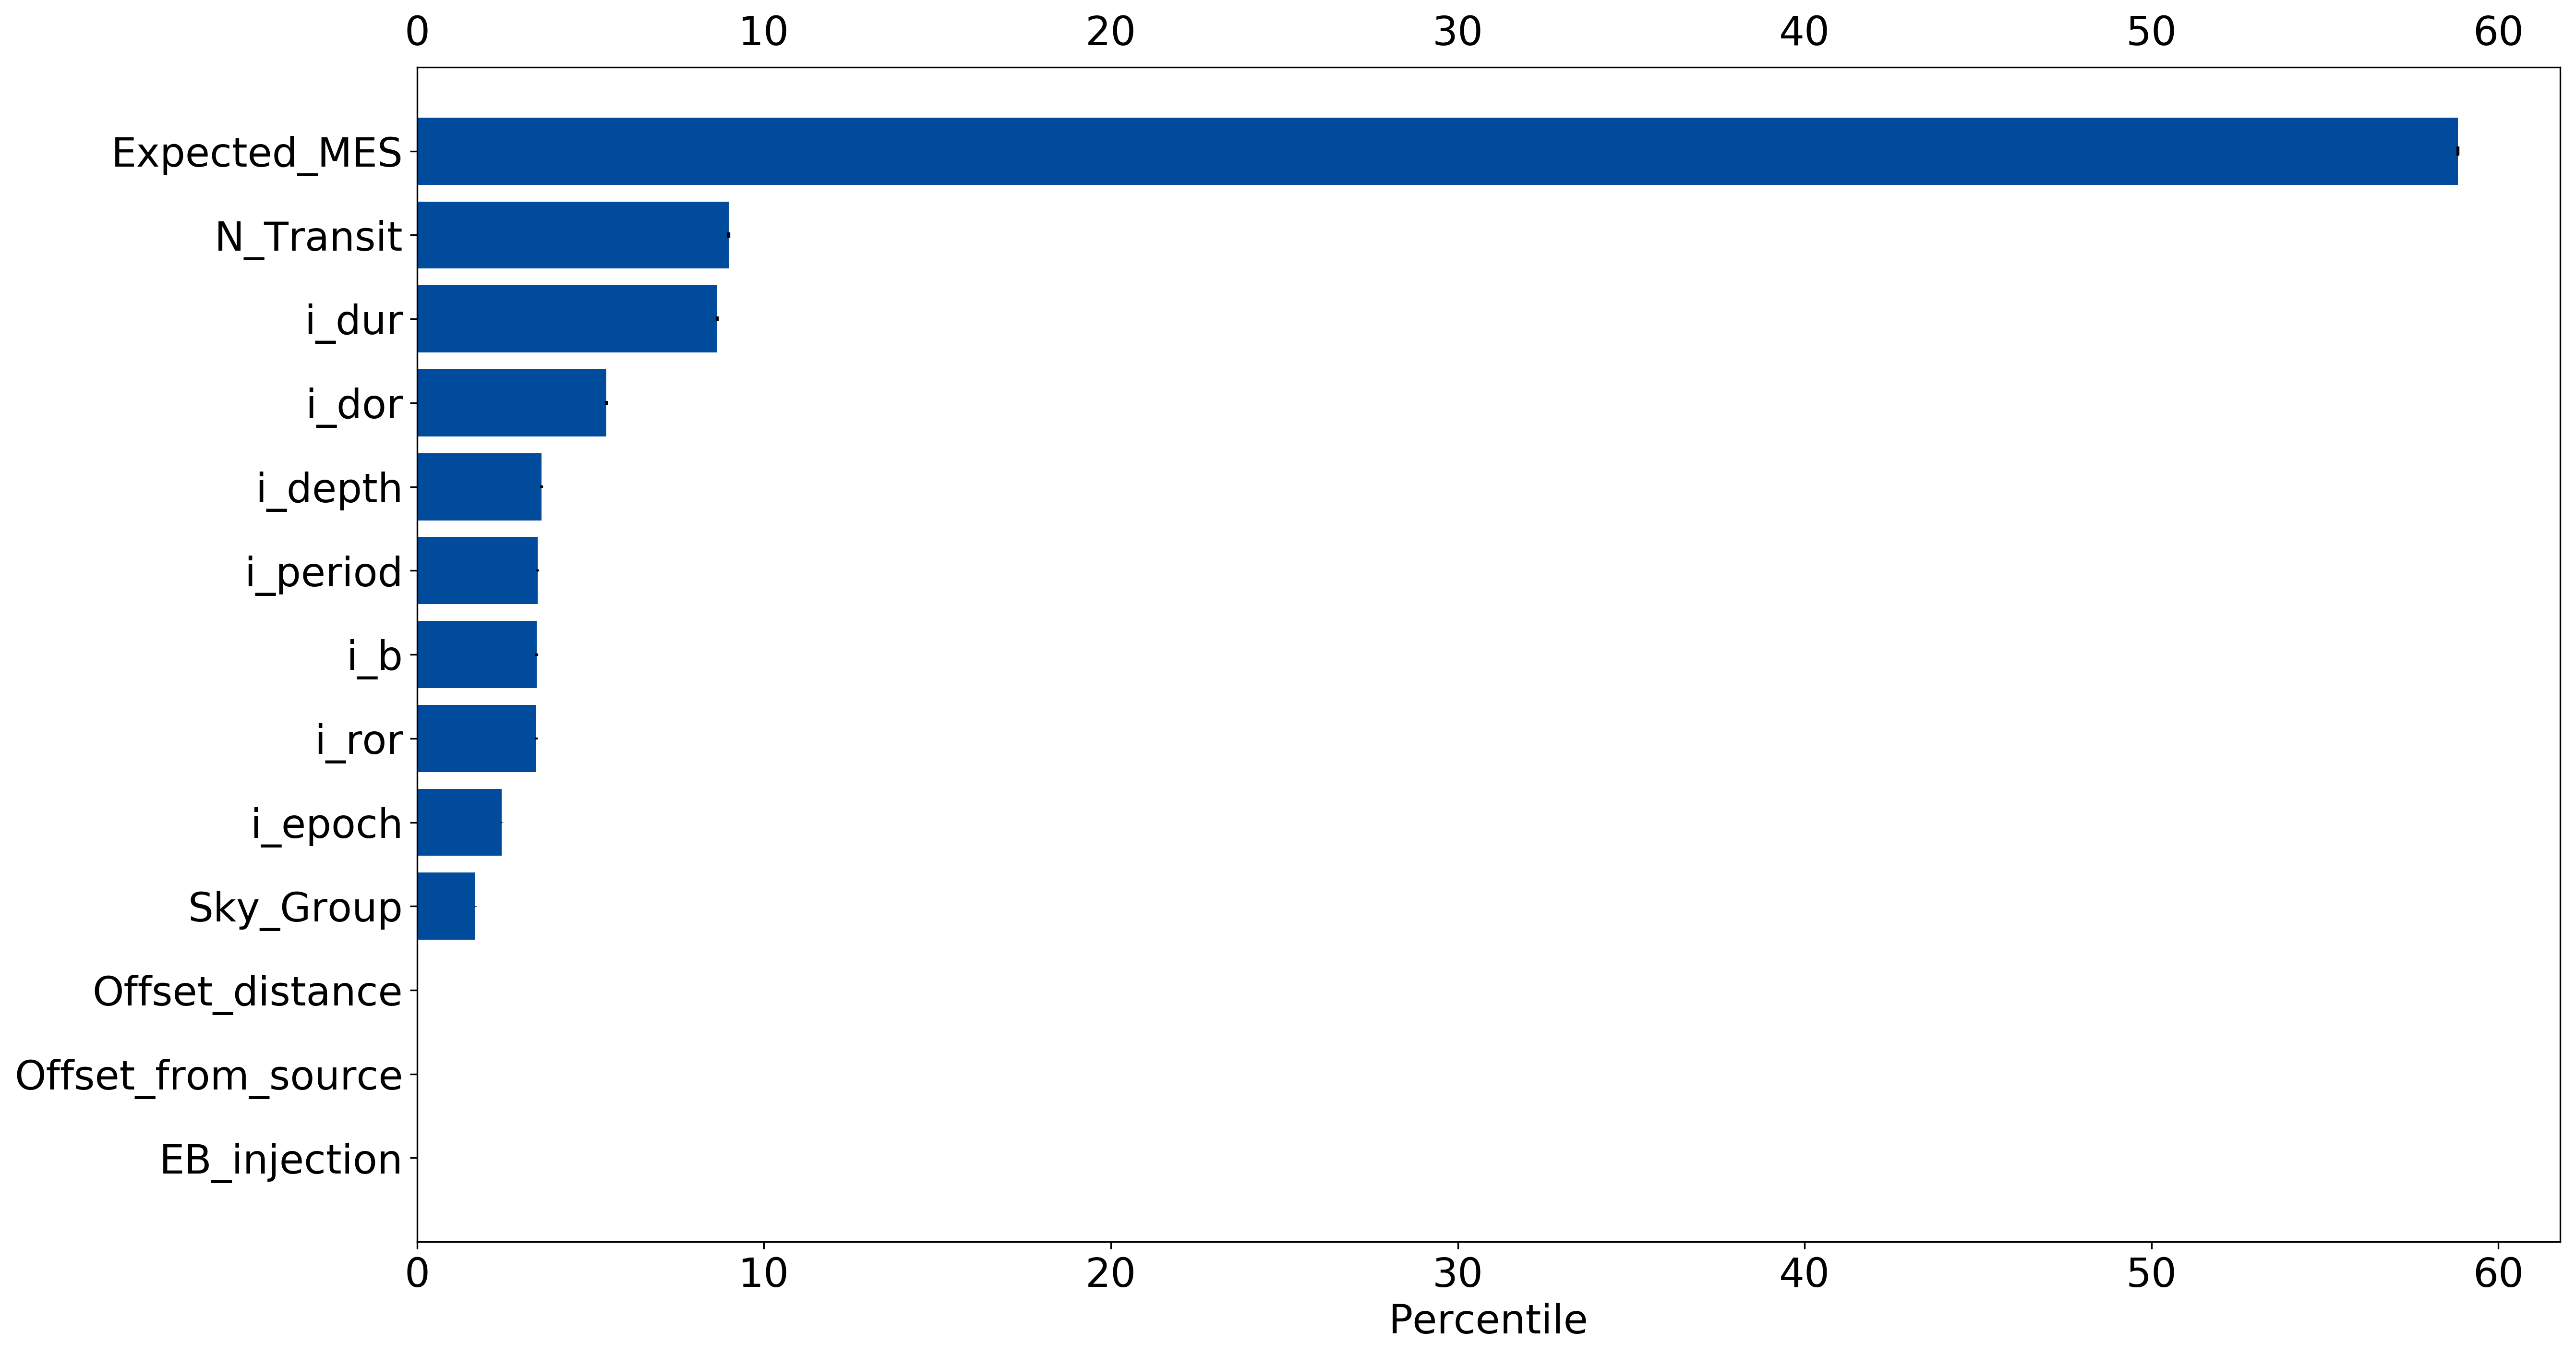

In [12]:
# Plot the feature importances of the forest
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()
plt.barh(range(X.shape[1]), rfc_importances[rfc_indices]*100, color = '#004B9B', yerr=rfc_std[rfc_indices], align="center")

plt.yticks(range(X.shape[1]), rfc_cols_indices, fontsize=20)
plt.ylim([X.shape[1], -1])

plt.tick_params(axis='x', labelbottom = True, labeltop = True)
plt.xticks(fontsize = 20)
plt.xlabel('Percentile', fontsize=20)

plt.savefig('full_dataset - random_forest.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [13]:
# Build a forest and compute the feature importances
xgb = XGBClassifier(n_estimators = 100, max_depth = 20, random_state=0)

xgb.fit(X, Y)
xgb_importances = xgb.feature_importances_
#xgb_std = np.std([tree.feature_importances_ for tree in xgb.estimators_], axis = 0)
xgb_indices = np.argsort(xgb_importances)[::-1]
xgb_cols_indices = cols_indices[xgb_indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, xgb_cols_indices[f], xgb_importances[xgb_indices[f]]))

Feature ranking:
1. Expected_MES (0.125084)
2. i_epoch (0.119550)
3. i_dur (0.114407)
4. i_b (0.110495)
5. i_depth (0.098784)
6. i_period (0.096495)
7. i_dor (0.093549)
8. Sky_Group (0.093003)
9. i_ror (0.074404)
10. N_Transit (0.074229)
11. Offset_distance (0.000000)
12. Offset_from_source (0.000000)
13. EB_injection (0.000000)


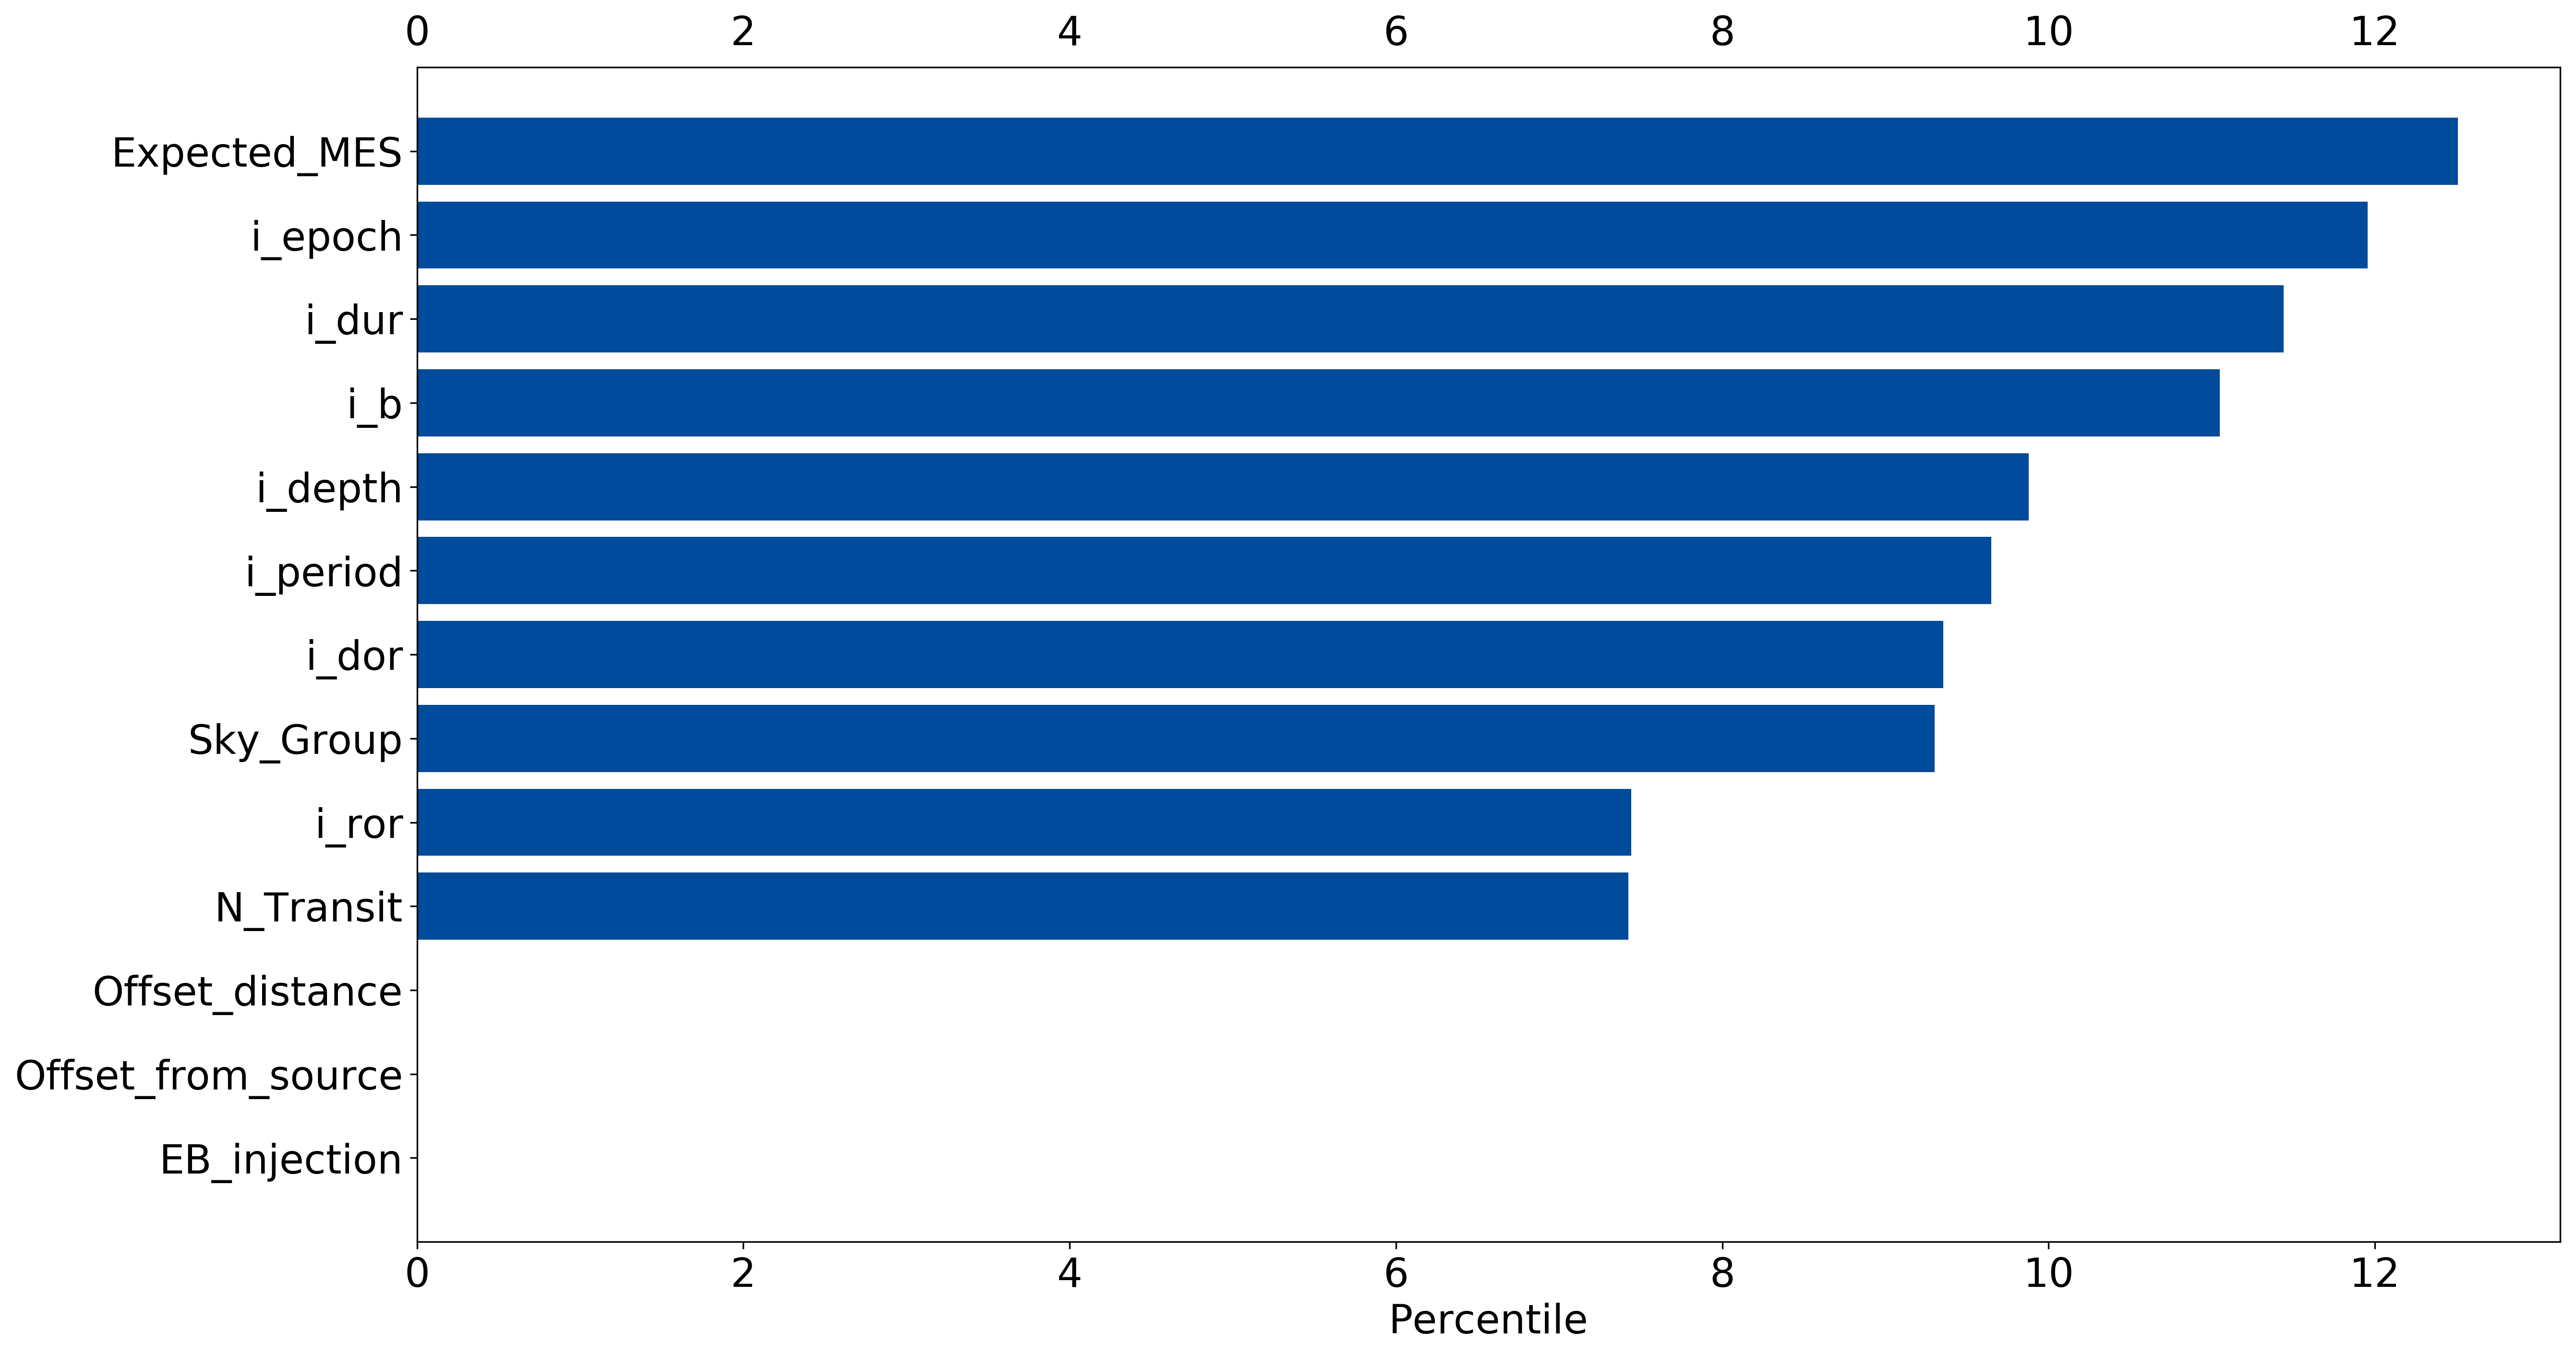

In [14]:
# Plot the feature importances of the forest
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()
plt.barh(range(X.shape[1]), xgb_importances[xgb_indices]*100, color = '#004B9B', align="center")

plt.yticks(range(X.shape[1]), xgb_cols_indices, fontsize=20)
plt.ylim([X.shape[1], -1])

plt.tick_params(axis='x', labelbottom = True, labeltop = True)
plt.xticks(fontsize = 20)
plt.xlabel('Percentile', fontsize=20)

plt.savefig('full_dataset - xgboost.jpg', dpi=1200, bbox_inches='tight')
plt.show()

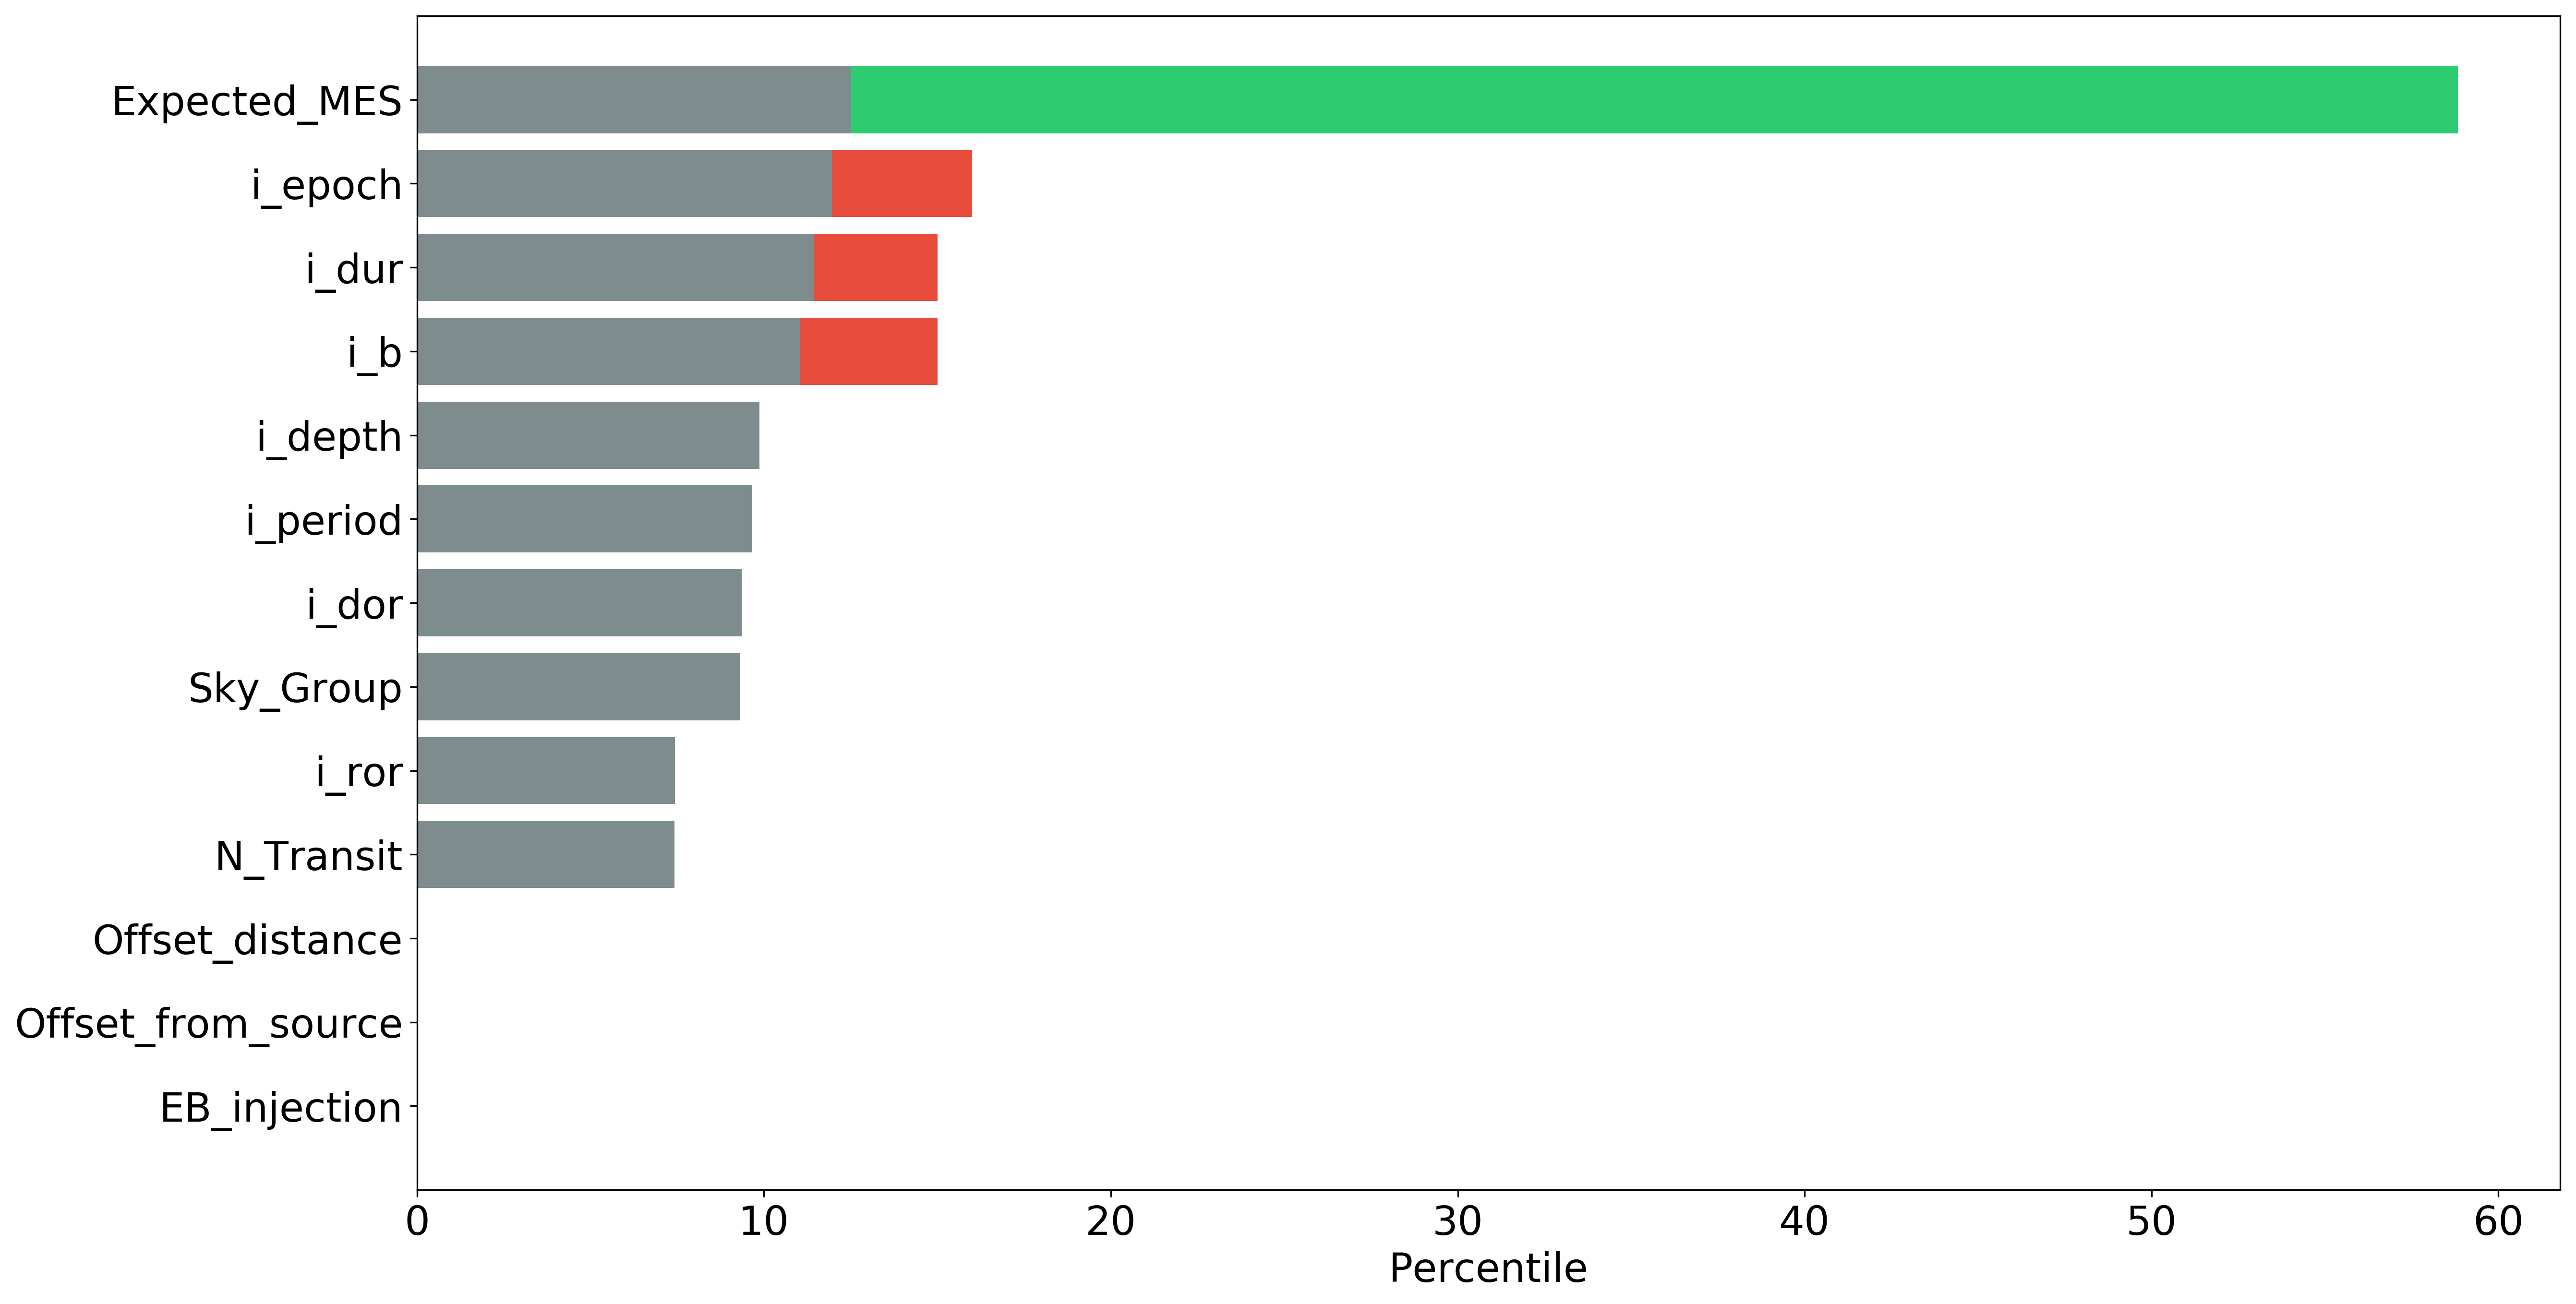

In [15]:
# Plot all the plots together
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

plt.barh(range(X.shape[1]), abc_importances[abc_indices] * 100, color = '#E74C3C')
plt.barh(range(X.shape[1]), etc_importances[etc_indices] * 100, color = '#3498DB')
plt.barh(range(X.shape[1]), rfc_importances[rfc_indices] * 100, color = '#2ECC71')
plt.barh(range(X.shape[1]), xgb_importances[xgb_indices] * 100, color = '#7F8C8D')

plt.yticks(range(X.shape[1]), xgb_cols_indices, fontsize=20)
plt.ylim([X.shape[1], -1])

plt.xticks(fontsize = 20)
plt.xlabel('Percentile', fontsize=20)

plt.savefig('all_combined.jpg', dpi=1200, bbox_inches='tight')
plt.show()